In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb

import viz
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [3]:
df= wrangle.clean_cars(df)

In [4]:
train, validate, test = wrangle.split_cars(df)

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 513877 │ │ string      │ 16    │                                                          │
│ │ Number of columns │ 24     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ year                │    0 │      0 │    2000 │     3.8 │   2000 │    2000 │    2000 │     2000 │    ▁▂▂█  │  │
│ │ condition           │    0 │      0 │     3.4 │    0.95 │      1 │     2.7 │     4.2 │        5 │   ▄▄▅█▅  │  │
│ │ odometer            │    0 │      0 │   66000 │   51000 │      1 │   28000 │   96000 │   500000 │   █▃▁    │  │
│ │ mmr                 │    0 │      0 │   14000 │    8700 │     25 │    7500 │   18000 │    77000 │   █▆▁    │  │
│ │ sellingprice        │    0 │      0 │   14000 │    8800 │      1 │    7300 │   18000 │    52000 │   ▆█▄▁   │  │
│ │ saleyear            │    0 │      0 │    2000 │    0.27 │   2000 │    2000 │    2000 │     2000 │  ▁    █  │  │
│ │ age_at_sale         │    0 │      0 │     4.7 │     3.8 │      1 │       2 │       7 │       25 │   █▂▂    │  │
│ │ miles_per_year      │    0 │      0 │   16000 │    9100 │      0 │   10000 │   20000 │   220000 │    █     │  │
│ └─────────────────────┴──────┴────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                       │      0 │          0 │                            1 │                   520000 │  │
│ │ model                      │      0 │          0 │                            1 │                   520000 │  │
│ │ trim                       │      0 │          0 │                            1 │                   520000 │  │
│ │ body                       │      0 │          0 │                            1 │                   520000 │  │
│ │ transmission               │      0 │          0 │                            1 │                   520000 │  │
│ │ vin                        │      0 │          0 │                            1 │                   520000 │  │
│ │ state                      │      0 │          0 │                            1 │                   520000 │  │
│ │ color                      │      0 │          0 │                            1 │                   520000 │  │
│ │ interior                   │      0 │          0 │  

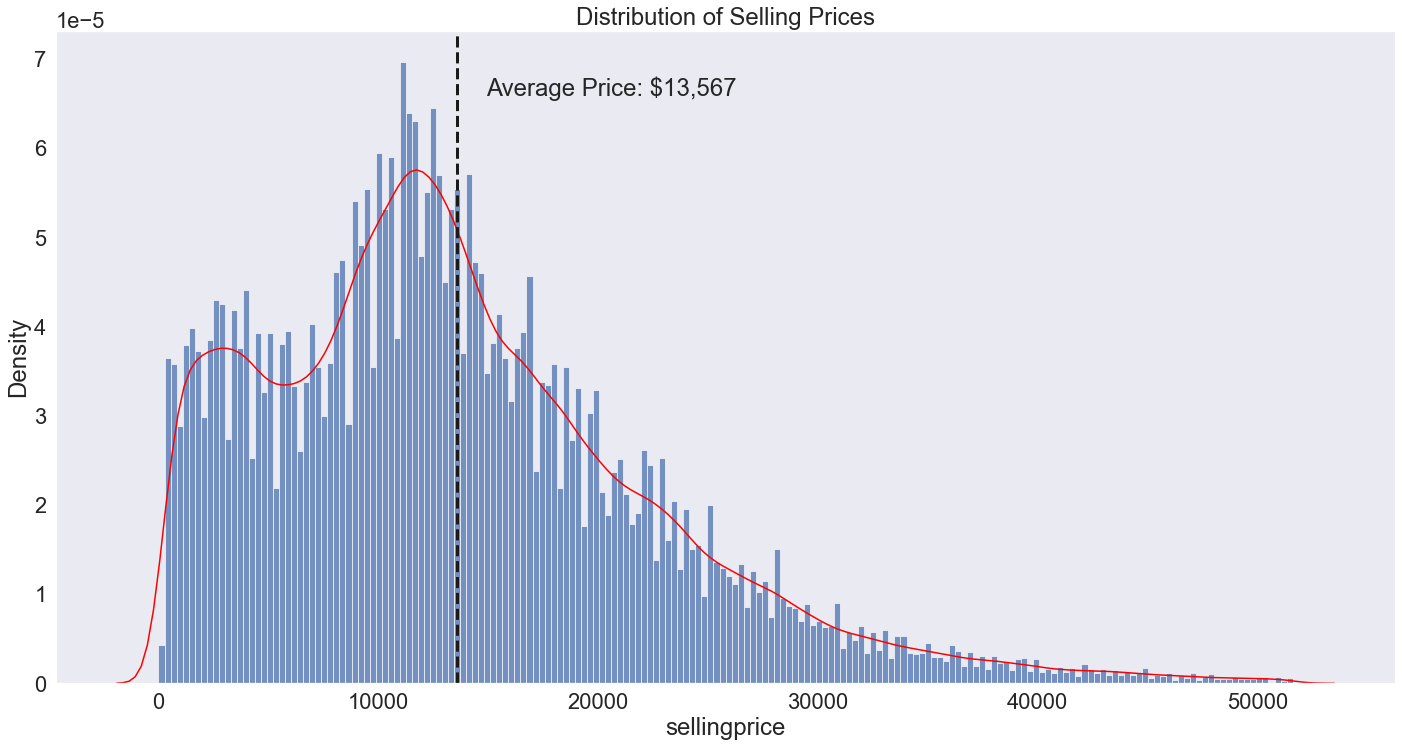

In [6]:
viz.plot_dist(df)

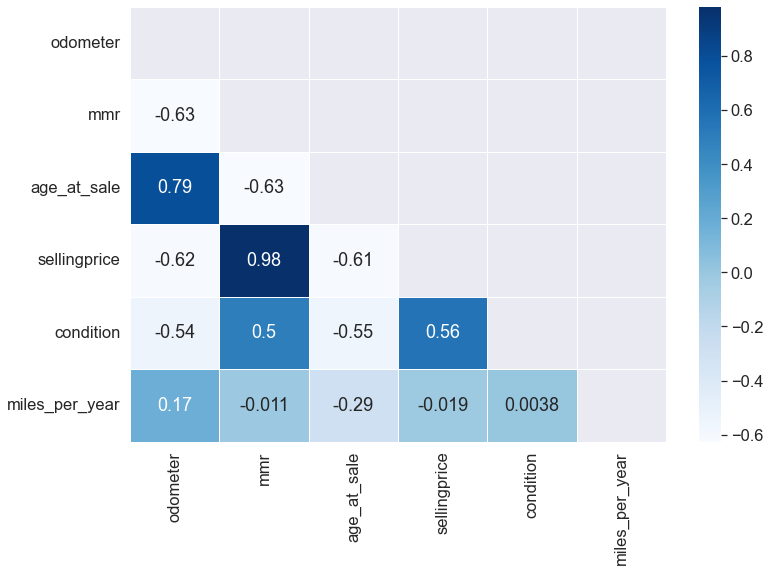

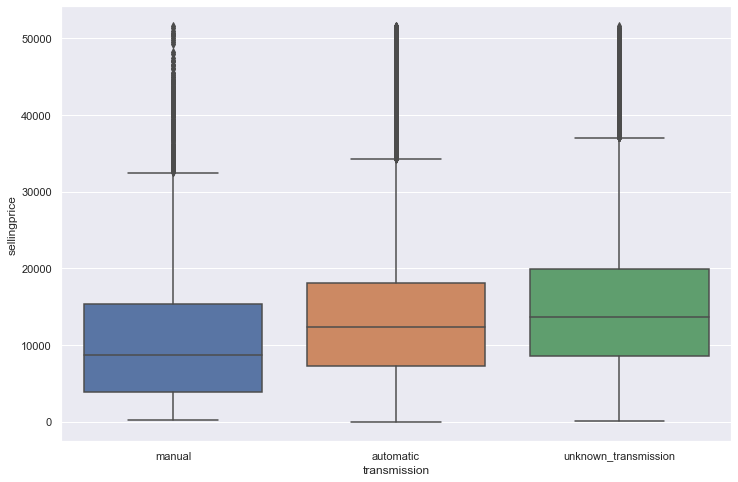

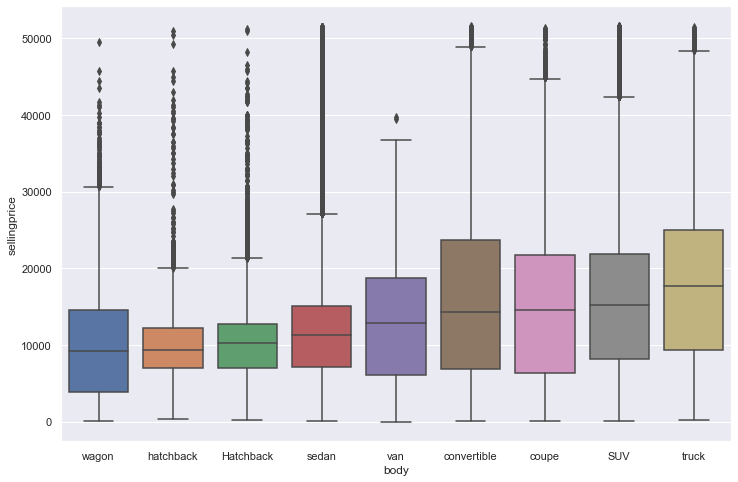

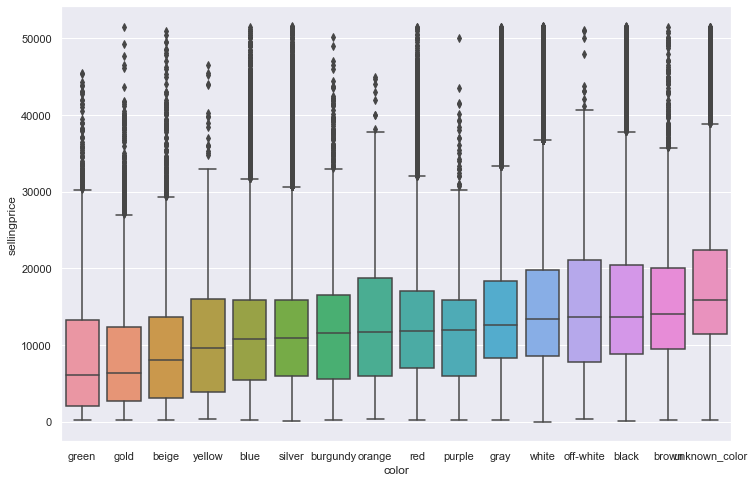

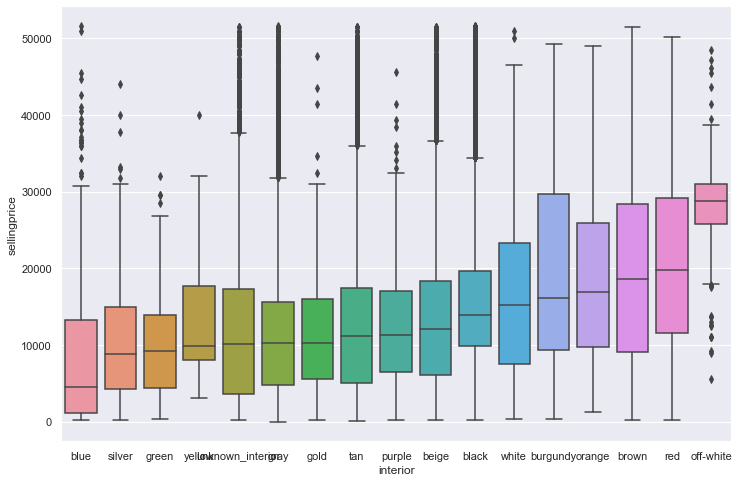

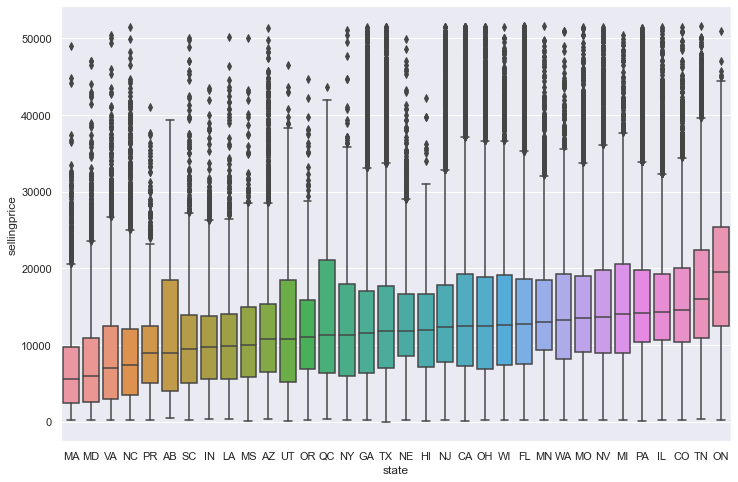

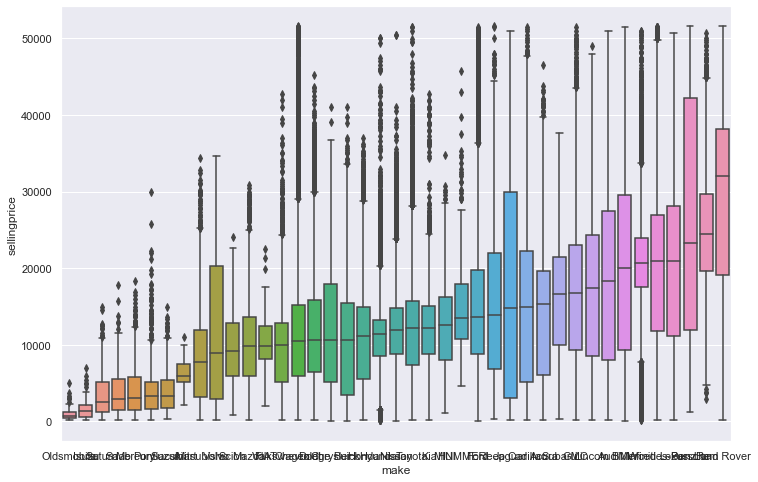

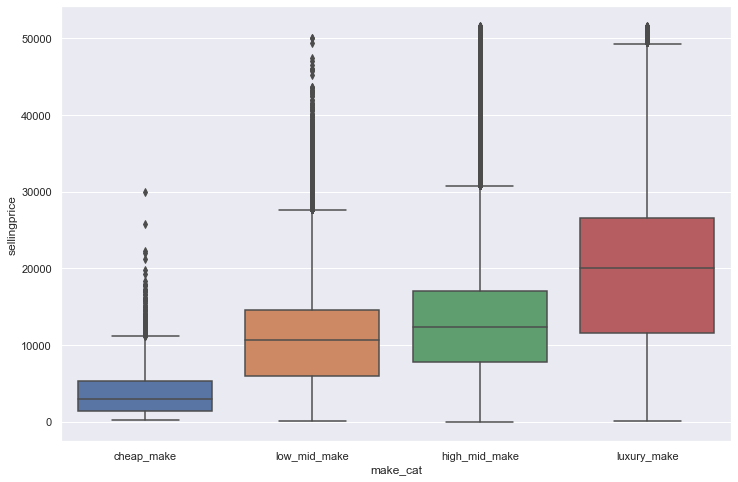

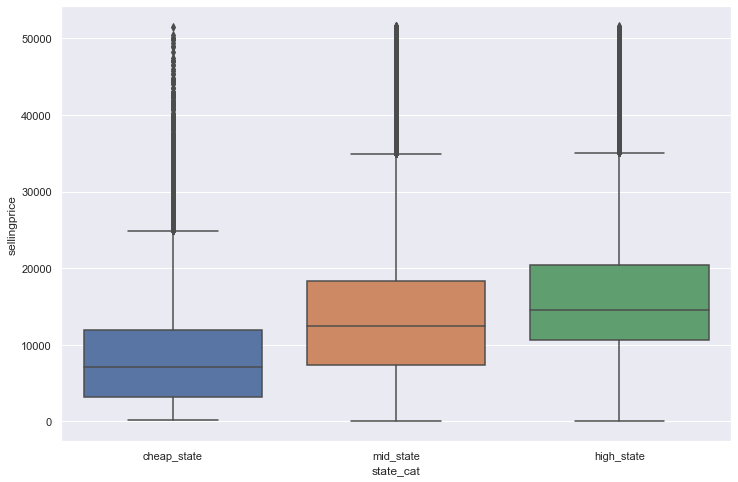

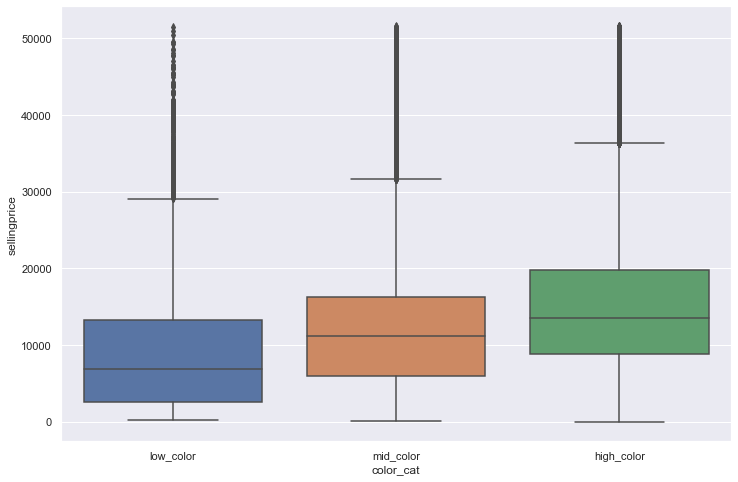

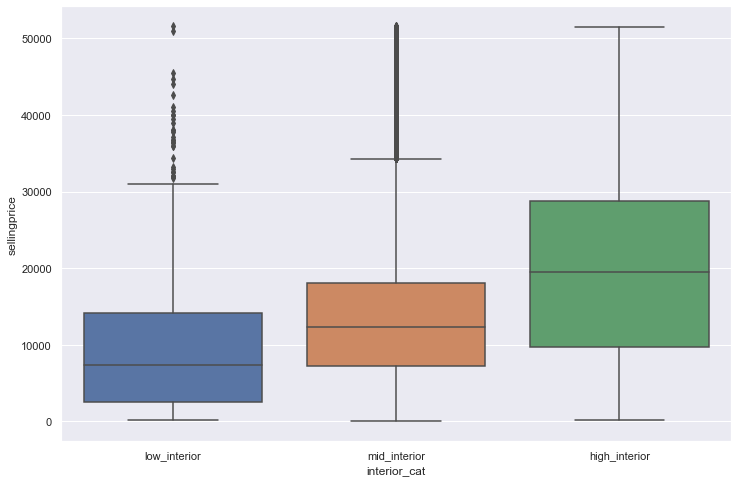

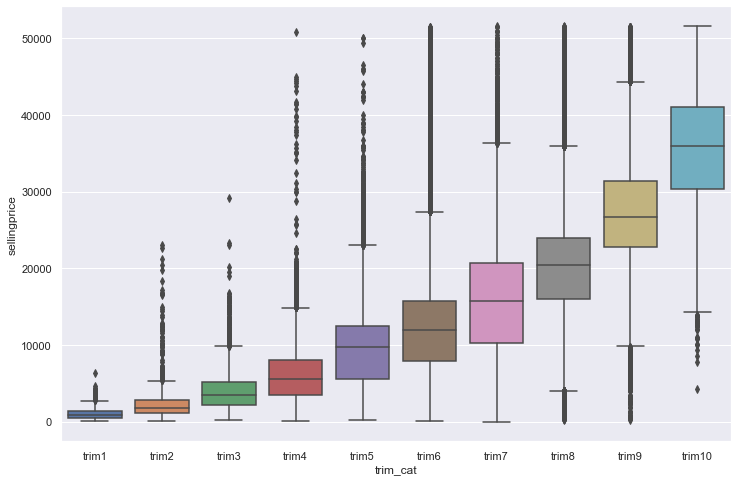

In [7]:
viz.corr_plot(train)

In [8]:
def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

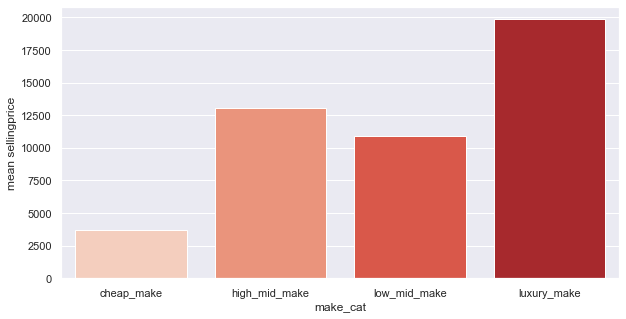

In [9]:
compare_means(train, 'make_cat', 'sellingprice')

In [10]:
for cat in ['make_cat', 'state_cat', 'color_cat', 'interior_cat', 'body', 'transmission', 'trim_cat']:
    dummies = pd.get_dummies(df[cat], drop_first=True)
    df = pd.concat([df, dummies], axis=1)

In [11]:
df.columns.tolist()

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate',
 'saleyear',
 'age_at_sale',
 'miles_per_year',
 'make_cat',
 'state_cat',
 'color_cat',
 'interior_cat',
 'trim_cat',
 'high_mid_make',
 'low_mid_make',
 'luxury_make',
 'high_state',
 'mid_state',
 'low_color',
 'mid_color',
 'low_interior',
 'mid_interior',
 'SUV',
 'convertible',
 'coupe',
 'hatchback',
 'sedan',
 'truck',
 'van',
 'wagon',
 'manual',
 'unknown_transmission',
 'trim10',
 'trim2',
 'trim3',
 'trim4',
 'trim5',
 'trim6',
 'trim7',
 'trim8',
 'trim9']

In [56]:
features = ['year',
 
 'condition',
 'odometer',
 'mmr',
 'sellingprice',
 'age_at_sale',
 'miles_per_year',
 'high_mid_make',
 'low_mid_make',
 'luxury_make',
 'high_state',
 'mid_state',
 'low_color',
 'mid_color',
 'low_interior',
 'mid_interior',
 'SUV',
 'convertible',
 'coupe',
 'hatchback',
 'sedan',
 'truck',
 'van',
 'wagon',
 'manual',
 'unknown_transmission',
 'trim10',
 'trim2',
 'trim9']

In [57]:
train, validate, test = wrangle.split_cars(df[features])

In [58]:
X_train = train.drop(columns = 'sellingprice')
X_val = validate.drop(columns= 'sellingprice')
X_test = test.drop(columns='sellingprice')

y_train = train.sellingprice
y_val = validate.sellingprice
y_test = test.sellingprice

In [150]:
# build pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', xgb.XGBRegressor(eta=.1,
                                                                           gamma=0,
                                                                           min_child_weight=3,
                                                                           max_depth=6))])

In [151]:
# fit model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.100000001, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=3,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_

In [152]:
# predict
yhat_train = pipeline.predict(X_train)
yhat_val = pipeline.predict(X_val)

In [153]:
rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
rmse_val = mean_squared_error(y_val, yhat_val, squared=False)
r2_train = r2_score(y_train, yhat_train)
r2_val = r2_score(y_val, yhat_val)



In [154]:
print(rmse_train, r2_train)

1351.0193492599942 0.9761954443006364


In [155]:
print(rmse_val, r2_val)

1413.408687759853 0.9739716401291201


LRmodel - Best RMSE:  train=1470/97% , val=1474/97%

XGmodel - Best RMSE:  train=1320/98% , val=1416/97%

    Predicting mean selling price (Mean baseline):  $8756 
    Predicting MMR (MMR baseline):  $1659

In [83]:
rmse_test = mean_squared_error(y_test, yhat_test, squared=False)
r2_test = r2_score(y_test, yhat_test)
print(rmse_test, r2_test)

1404.659115649439 0.9744190392855372


In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

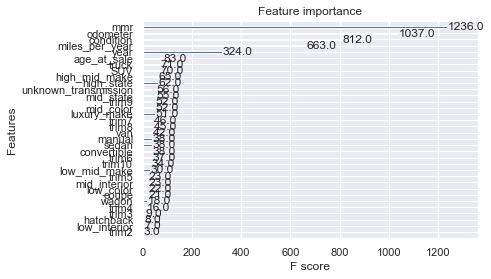

In [34]:
xgb.plot_importance(xgboostmodel)